**PROBLEM STATEMENT** :
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. 
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**HYPOTHESES GENERATION**:
>Product level hypotheses:
1. >Brand                : Branded products have more trust of the customers so they should have high sales.
2. >Visibility in Store  : The location of the product placement also depends on the sales.
3. >Display Area        : Products that are placed at an attention-catching place should have more sales.
4. >Utility             : Daily use products have a higher tendency to sell compared to other products.
5. >Packaging           : Quality packaging can attract customers and sell more.

>Store Level Hypotheses:
1. >City type         : Stores located in urban cities should have higher sales.
2. >Store Capacity    : One-stop shops are big in size so their sell should be high.
3. >Population density: Densely populated areas have high demands so the store located in these areas should have higher sales.
4. >Marketing         : Stores having a good marketing division can attract customers through the right offers.

In [1]:
#Loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading Data
train = pd.read_csv("D:\9961_14084_bundle_archive\Train.csv")
test = pd.read_csv("D:\9961_14084_bundle_archive\Test.csv")

In [3]:
train.shape ,test.shape

((8523, 12), (5681, 11))

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
 test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


**Exploratory Data Analysis**

**Univariate**

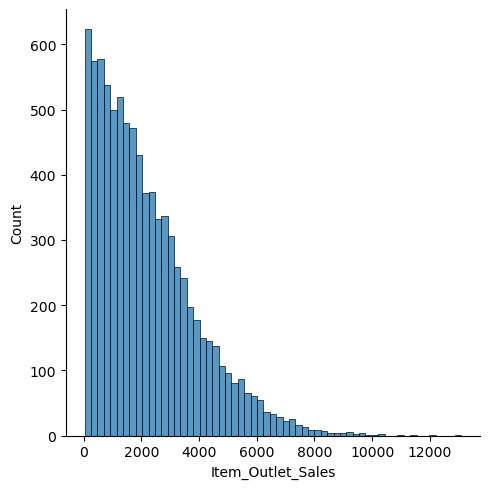

In [8]:
sns.displot(train['Item_Outlet_Sales'])

**Bivariate**

Text(0.5, 1.0, 'Item_Weight and Item_Outlet_Sales Analysis')

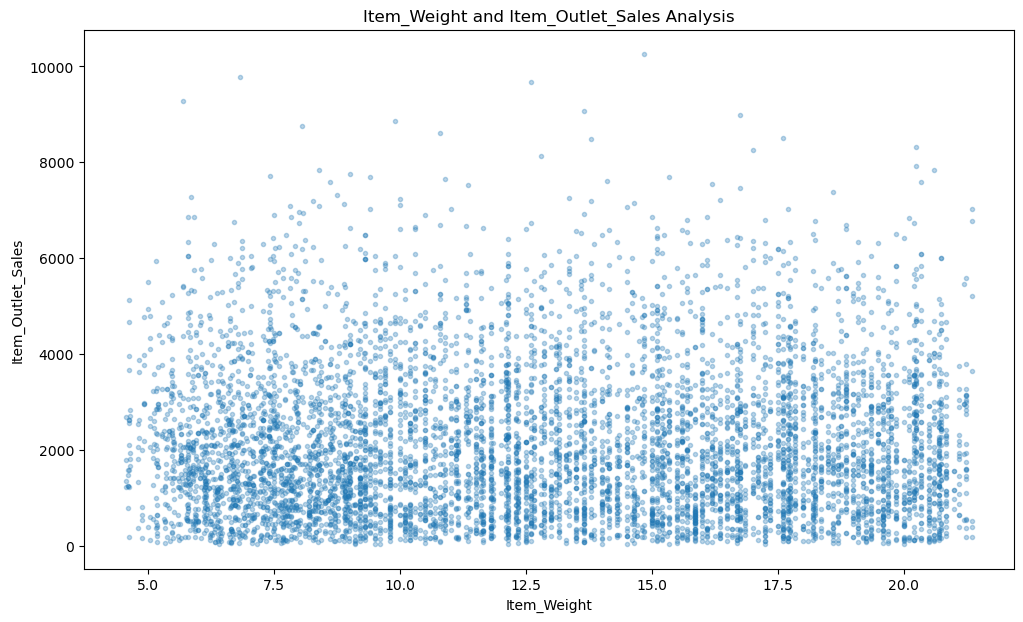

In [9]:
plt.figure(figsize=(12,7))
plt.plot(train.Item_Weight,train['Item_Outlet_Sales'],'.',alpha=0.3)
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")

Text(0.5, 1.0, 'Item_Visibility and Item_Outlet_Sales Analysis')

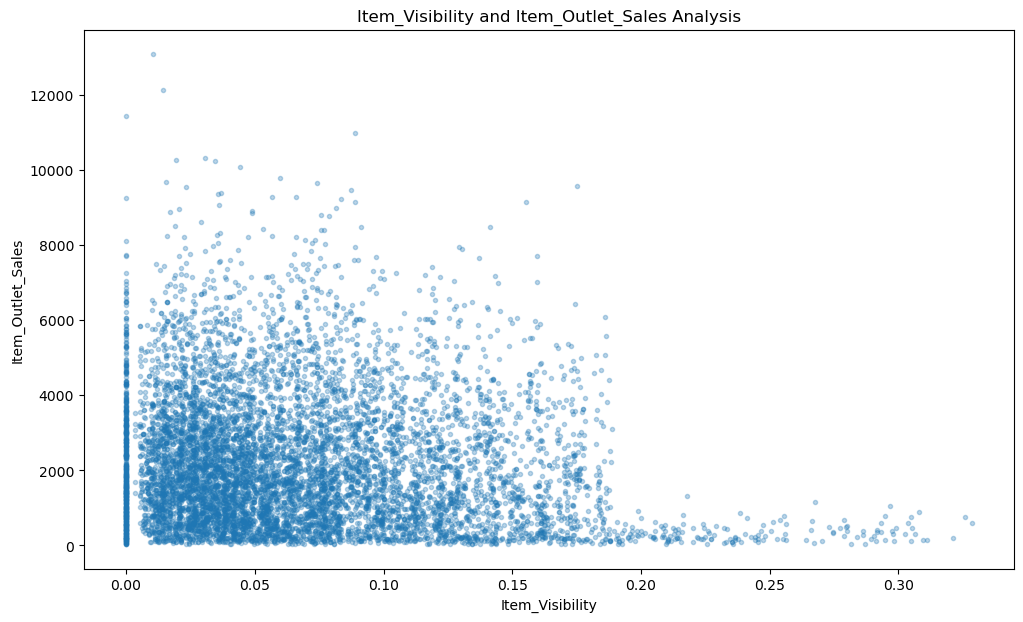

In [10]:
plt.figure(figsize=(12,7))
plt.plot(train.Item_Visibility,train['Item_Outlet_Sales'],'.',alpha=0.3)
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

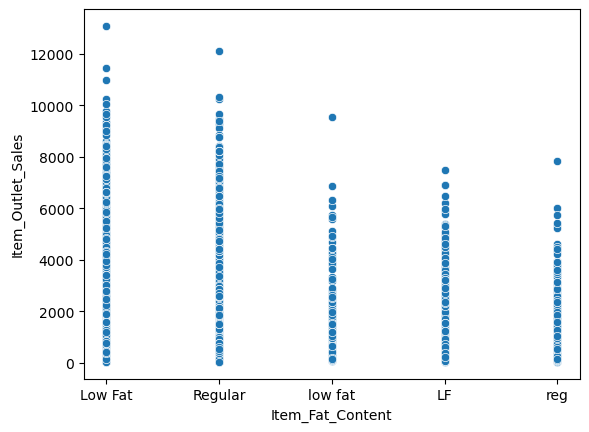

In [11]:
sns.scatterplot(x=train.Item_Fat_Content, y=train.Item_Outlet_Sales)


C:\Users\Kavita choudhary\AppData\Local\Temp\ipykernel_27896\1569063727.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=train.corr()


<Axes: >

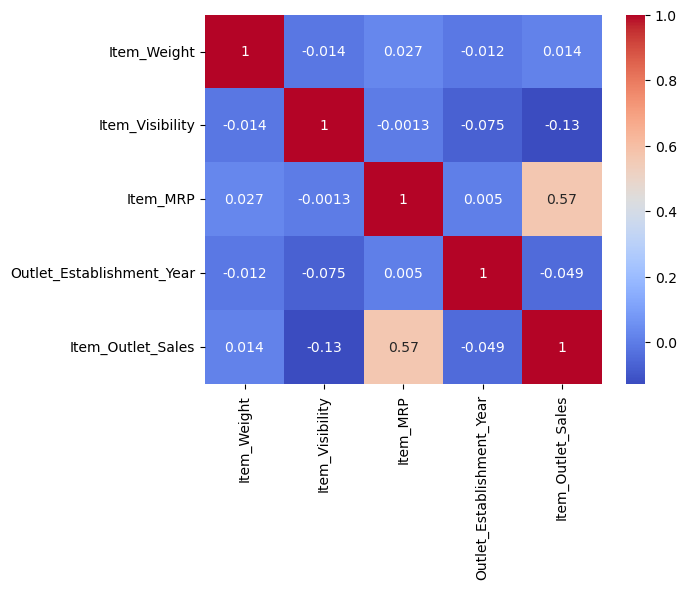

In [12]:
corr_matrix=train.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

**Multivariate**

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

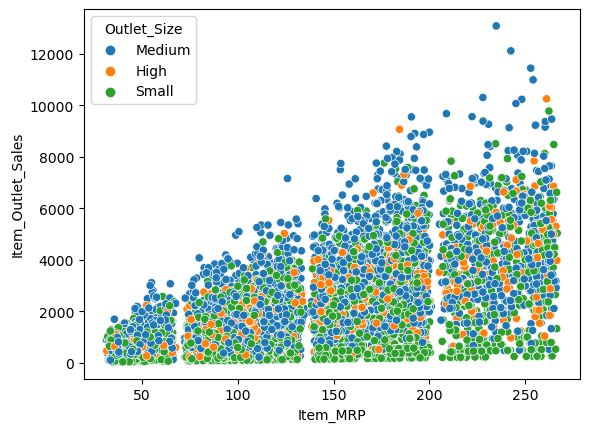

In [13]:
sns.scatterplot(data=train, x="Item_MRP", y="Item_Outlet_Sales", hue="Outlet_Size")


<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

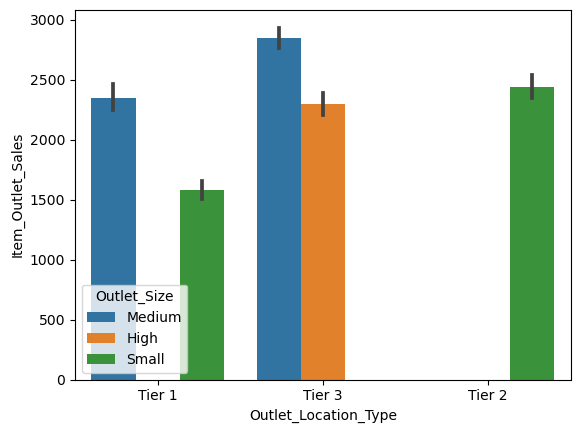

In [14]:
# Create a bar plot of Outlet_Location_Type vs Item_Outlet_Sales
sns.barplot(data=train, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Size')

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

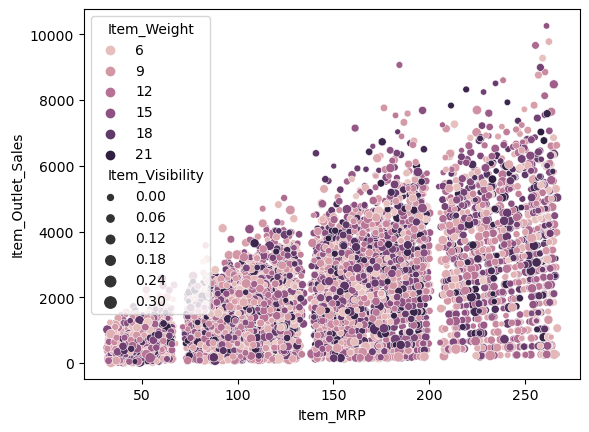

In [15]:
sns.scatterplot(data=train, x="Item_MRP", y="Item_Outlet_Sales", hue="Item_Weight", size="Item_Visibility")

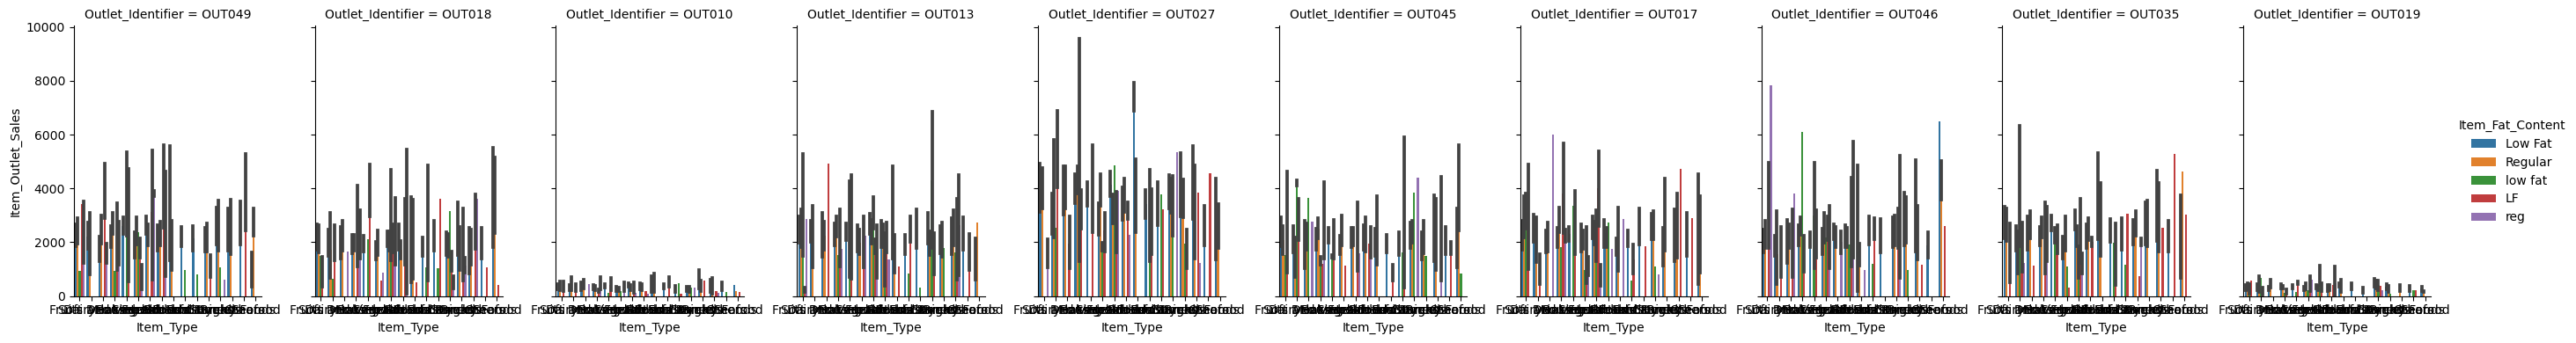

In [16]:
sns.catplot(x="Item_Type", y="Item_Outlet_Sales", hue="Item_Fat_Content", col="Outlet_Identifier", data=train, kind="bar", height=4, aspect=0.7)

In [17]:
# join train and test dataset
train['source'] ='train'
test['source']='test'
data = pd.concat([train,test])
data.shape

(14204, 13)

In [18]:
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [19]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

This tell us that there are 1559 products and 10 outlets/store(which was mentioned in problem statement).And that Item_Type has 16 unique values.

In [20]:
#look at categorical and numerical variables
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

**Data Cleaning**

In [21]:
#Finding missing values
#Is there missing values or not in data(train and test)
train.isnull().values.any() ,test.isnull().values.any()

(True, True)

In [22]:
train.isnull().sum() ,test.isnull().sum()

(Item_Identifier                 0
 Item_Weight                  1463
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  2410
 Outlet_Location_Type            0
 Outlet_Type                     0
 Item_Outlet_Sales               0
 source                          0
 dtype: int64,
 Item_Identifier                 0
 Item_Weight                   976
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  1606
 Outlet_Location_Type            0
 Outlet_Type                     0
 source                          0
 dtype: int64)

In [23]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

`In test dataset Item_Outlet_Sales contain missing value which is target column because test data doen't have that column.
In train dataset Item_Weight and Outlet_Size contain missing values so We will fill missing values in Item_Weight column with mean because itis a Numerical Feature and Outlet_Size is a Categorical Feature for this we will use mode to fill missing values.`

In [24]:
data["Item_Weight"].mean()

12.792854228644284

In [25]:
data["Item_Weight"]=data["Item_Weight"].fillna(np.mean(data["Item_Weight"]))

In [26]:
data["Item_Weight"].isnull().sum()

0

In [27]:
data["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [28]:
data["Outlet_Size"]=data["Outlet_Size"].replace(np.nan, 'Medium')

In [29]:
data["Outlet_Size"].isnull().sum()

0

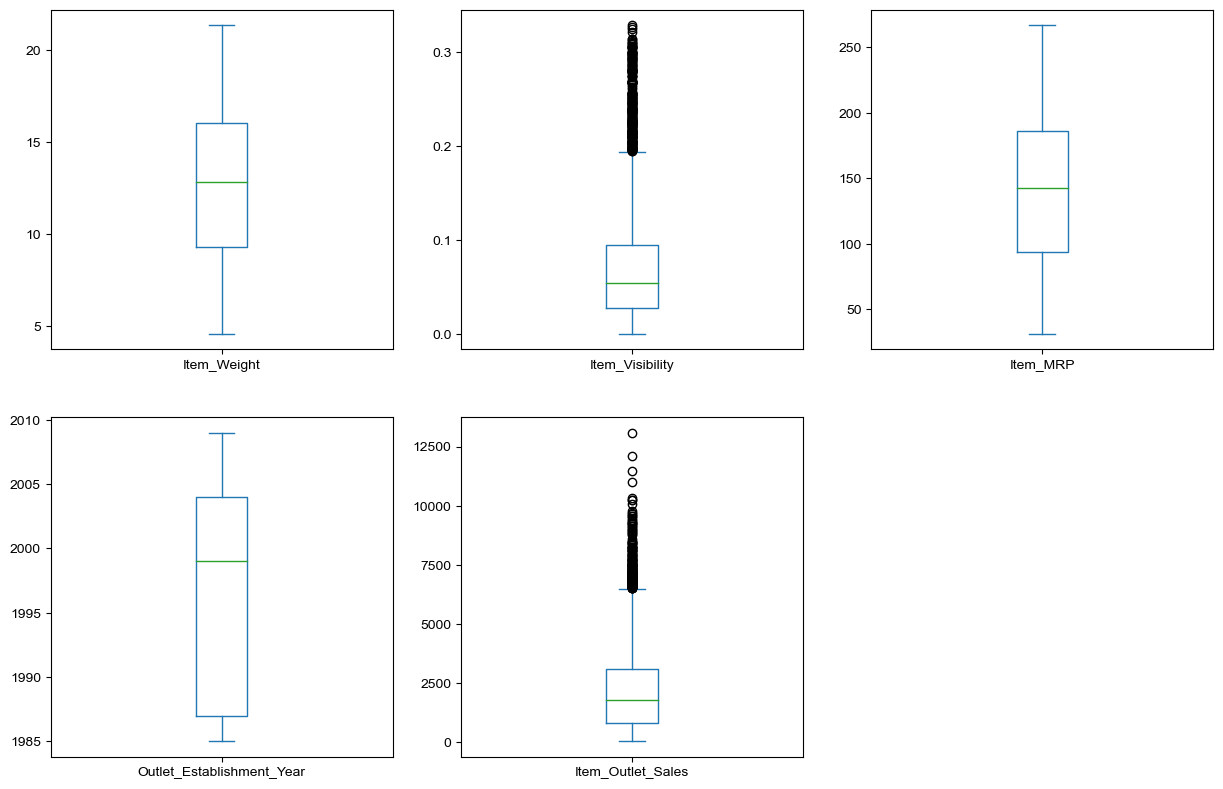

In [30]:
data.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False,figsize=(15,15))
sns.set(font_scale=1.5)

In [31]:
data['Item_Visibility'].value_counts()

0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [32]:
data['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

Item_Visibility had minimum value 0. So this make no sense ,lets consider it as missing value and impute with its mean. 

In [33]:
#Determine average visibility of a product
visibility_avg= data.pivot_table(values='Item_Visibility', index='Item_Identifier')
#Impute 0 values with mean visibility of that product
missing_values=(data['Item_Visibility']==0)
print('Number of 0 values initially: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility']=data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x,'Item_Visibility'])
print('Number of 0 values after modification: %d'%sum(data['Item_Visibility']==0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


**Feature Egineering**

In [34]:
#Modify categories of Item_Fat_Content
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [35]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [36]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [37]:
#Create new column Outlet_Years Remember the data is from 2013
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [38]:
data['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [39]:
#Create a broad category of Type of Item ID
#Item_Type variable has 16 categories which might prove to be very useful in anlysis.So it is good idea to combine them.
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumble','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food             10201
Non-Consumble     2686
Drinks            1317
Name: Item_Type_Combined, dtype: int64

**Outliers Handling**

In [40]:
data['Item_Visibility']=np.log(data['Item_Visibility'])

In [41]:
data['Item_Outlet_Sales']=np.log(data['Item_Outlet_Sales'])

In [42]:
#label encoding for Categorical Feature
numerical_columns = [col for col in data.columns if data.dtypes[col]!='object']
print('Numerical Features are:',numerical_columns)

Numerical Features are: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Years']


In [43]:
categorical_columns = [col for col in data.columns if data.dtypes[col]=='object']
print('Categorical Features are:',categorical_columns)

Categorical Features are: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source', 'Item_Type_Combined']


In [44]:
from sklearn.preprocessing import LabelEncoder


In [45]:
le = LabelEncoder()
#New variable for Outlet
data['Outlet']= le.fit_transform(data['Outlet_Identifier'])

In [46]:
var_mod=['Item_Type_Combined','Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [47]:
for i in var_mod:
    data[i]=le.fit_transform(data[i])

In [48]:
#One Hot Encodeing
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet','Item_Type_Combined'])

In [49]:
# Drop columns which combined convert different type
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

# Divide data into train and test
train= data.loc[data['source']=="train"]
test=data.loc[data['source']=="test"]
#Drop unnecessary columns
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
#Export files as modified versions
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)
X_test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()
X_train =train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train =train['Item_Outlet_Sales']


C:\Users\Kavita choudhary\AppData\Local\Temp\ipykernel_27896\3624727792.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
C:\Users\Kavita choudhary\AppData\Local\Temp\ipykernel_27896\3624727792.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)


**Data Modeling**

In [50]:
#Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [51]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6818, 29), (1705, 29), (6818,), (1705,))

In [52]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [53]:
model_pred= model.predict(X_test)
model_pred

array([6.98725876, 6.68113565, 6.7212494 , ..., 6.68451022, 6.58433381,
       7.20740495])

In [54]:
from sklearn.metrics import mean_squared_error
model_rmse = np.sqrt(mean_squared_error(y_test, model_pred))
model_mean=mean_absolute_error(y_test,model_pred)
model_r2=r2_score(y_test,model_pred)
print("MAE of LR model is:",model_mean)
print("R2 score of LR model is:",model_r2)
print('Linear Regression RMSE:', model_rmse)

MAE of LR model is: 0.41566215320972866
R2 score of LR model is: 0.7298659306680708
Linear Regression RMSE: 0.5339432488113235


In [55]:
model1=Ridge(alpha=0.1)
model1.fit(X_train,y_train)

Ridge(alpha=0.1)

In [56]:
y_pred_model1= model1.predict(X_test)

In [57]:
model1_rmse = np.sqrt(mean_squared_error(y_test, y_pred_model1))
model1_mean=mean_absolute_error(y_test,y_pred_model1)
model1_r2=r2_score(y_test,y_pred_model1)
print("Ridge Regression MAE :",model1_mean)
print("Ridge Regression R2 score :",model1_r2)
print('Ridge Regression RMSE:', model1_rmse)

Ridge Regression MAE : 0.4156636134193218
Ridge Regression R2 score : 0.7298641371154062
Ridge Regression RMSE: 0.5339450213640219


In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
model2=RandomForestRegressor()
model2.fit(X_train,y_train)

RandomForestRegressor()

In [60]:

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
rf_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_reg_mean=mean_absolute_error(y_test,y_pred)
rf_reg_r2=r2_score(y_test,y_pred)
print("Random Forest Regression MAE :",rf_reg_mean)
print("Random Forest Regression R2 score :",rf_reg_r2)
print('Random Forest Regression RMSE:', rf_reg_rmse)

Random Forest Regression MAE : 0.42488129016963444
Random Forest Regression R2 score : 0.7158467707374547
Random Forest Regression RMSE: 0.547623046781034


In [61]:
from xgboost import XGBRegressor


In [62]:
model4=XGBRegressor()
model4.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [63]:
y_pred_xgb=model4.predict(X_test)
model4_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
model4_mean=mean_absolute_error(y_test,y_pred_xgb)
model4_r2=r2_score(y_test,y_pred_xgb)
print("XGB Regression MAE :",model4_mean)
print("XGB Regression R2 score :",model4_r2)
print('XGB Regression RMSE:', model4_rmse)

XGB Regression MAE : 0.4278791485106152
XGB Regression R2 score : 0.7102170173733591
XGB Regression RMSE: 0.5530212993548652


In Regression model and Ridge Regression model MAE=0.41,RMSE=0.53,r2=72 and Random Forest MAE=0.42,RMSE=0.55,r2=0.71,so In my project Linear Regression and Ridge Regression performed well .